# Overview
This Notebook aims to get transcripts from YouTube videos of British MPs and parties. Therefore, I first create a table with all the channels that feature British MPs and the statistics of the channels. Afterwards, I will make a list of videos that feature on the most prominent and professional channels and get the Transcripts for some of those videos.

# Import of Packages and Data

In [1]:
# standard packages
import pandas as pd
import numpy as np
import random


# randomization
general_seed = 1984

# API handling
import requests
youtube_api_key_1 = '' ##insert API key here
youtube_api_key_2 = ''

!pip install youtube_transcript_api
from youtube_transcript_api import YouTubeTranscriptApi # get transcripts

# Visualisation
import seaborn as sn
import matplotlib.pyplot as plt

from google.colab import data_table
data_table.enable_dataframe_formatter()
from google.colab import files # for download

plt.rcParams.update({'axes.spines.top': False,  #https://stackoverflow.com/a/28720127
                     'axes.spines.right': False,#
                     'axes.spines.bottom': False,
                     'axes.spines.left': False,
                     'axes.titlesize': 10, #https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html
                     'axes.titlepad': 10})

I import my results so that we can look at the statistics later.

In [2]:
#https://www.geeksforgeeks.org/how-to-upload-folders-to-google-colab/

!git clone https://github.com/BeJa1996/political_hope_nostalgia/
!unzip political_hope_nostalgia/Training_Datasets.zip

fatal: destination path 'political_hope_nostalgia' already exists and is not an empty directory.
Archive:  political_hope_nostalgia/Training_Datasets.zip
replace Training_Datasets/data_polnos_handcoding.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Training_Datasets/data_polnos_handcoding.csv  
  inflating: Training_Datasets/Task 2_Test_with_labels_English_PolyHope.csv  
  inflating: Training_Datasets/data_polnos_handcoding_validation.csv  


# A Dataset of Youtube Channels Featuring British MPS

## Getting a List of British MPs

Theyworkforyou.com provides a list of British MPs. I take the list from before the parliament was dissolved on Mai 30, 2024.

In [ ]:
list_of_mps = pd.read_csv('https://www.theyworkforyou.com/mps/?f=csv&date=2024-05-30')
list_of_mps.head()

,Person ID,First name,Last name,Party,Constituency,URI
0,10001,Diane,Abbott,Labour,Hackney North and Stoke Newington,https://www.theyworkforyou.com/mp/10001/diane_...
1,25034,Debbie,Abrahams,Labour,Oldham East and Saddleworth,https://www.theyworkforyou.com/mp/25034/debbie...
2,25661,Bim,Afolami,Conservative,Hitchin and Harpenden,https://www.theyworkforyou.com/mp/25661/bim_af...
3,11929,Adam,Afriyie,Conservative,Windsor,https://www.theyworkforyou.com/mp/11929/adam_a...
4,25817,Nickie,Aiken,Conservative,Cities of London and Westminster,https://www.theyworkforyou.com/mp/25817/nickie...


In [ ]:
list_of_mps.shape

(650, 6)

## Getting Channels through Youtube API Data Search

Google allows for only 100 search requests a day. Therefore, I had to run the following code on multiple days successively.
First, I import the results from the previous runs. Then, I get the last politician from the previous run.


The following text is commented out because it is unnecessary if you run the code for the first time.

In [ ]:
# import previous runs
#old_possible_channels = pd.read_csv('possible_channels.csv', sep = ";")
#del(old_possible_channels['Unnamed: 0']) # delete the index

# getting the last politician from the previous run
#last_politician = list_of_mps.loc[
#    (list_of_mps['First name'] == old_possible_channels['First_Name'].iloc[-1]) &
#    (list_of_mps['Last name'] == old_possible_channels['Last_Name'].iloc[-1])
#  ]
#last_politician

The following code queries the YouTube search API. I got the link composition (2part = snippet", etc.) from the API's explorer, which appears on the right part of the website when you open https://developers.google.com/youtube/v3/docs/search/list. However, at the time of writing (28.05.2024), the button to the URL code does not exist anymore.

In [ ]:
url_pre = 'https://youtube.googleapis.com/youtube/v3/search?' # https://developers.google.com/youtube/v3/docs/search/list
#create dictionary
channels_dict = {'First_Name':[],
                 'Last_Name': [],
                 'Channel_Name':[],
                 'Channel_ID': [] }

# Forloop to query the channels
for mp in range(0, #comment out, when not the first run
                #last_politician.index[0] + 1, # comment out, when first run
                len(list_of_mps)):
  # Get Name of MP
  first_name = list_of_mps.loc[mp, 'First name']
  last_name = list_of_mps.loc[mp, 'Last name']

  # Get possible channels (explanation here https://developers.google.com/youtube/v3/docs/search/list)
  url = f'{url_pre}part=snippet&q={first_name}%20{last_name}%20mp&type=channel&key={youtube_api_key_1}'
  r = requests.get(url)
  print(r)
  if r.status_code == 403: # 403 = limit exceeded, so it stops
    break

  # Enter channels into dictionary
  result = r.json()
  try:
      for i in range(0,min(3, result['pageInfo']['resultsPerPage'])):
        channels_dict['First_Name'].append(first_name)
        channels_dict['Last_Name'].append(last_name)
        channels_dict['Channel_Name'].append(result['items'][i]['snippet']['title'])
        channels_dict['Channel_ID'].append(result['items'][i]['snippet']['channelId'])
  except:
      print(first_name + ' ' + last_name)
      print(i)

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200

In [ ]:
possible_channels = pd.DataFrame(channels_dict)
#possible_channels = pd.concat([old_possible_channels, possible_channels], axis = 0) #uncomment when not first run
possible_channels.to_csv('possible_channels.csv')
possible_channels.tail()

,First_Name,Last_Name,Channel_Name,Channel_ID
280,Bambos,Charalambous,APPG Vaccinations for All,UCOo4RHx3vTuRndq1NJKoY4Q
281,Bambos,Charalambous,Labour Friends of Palestine and the Middle East,UCI0W74H7pbStogOcVOaeS7g
282,Joanna,Cherry,Braidburn Branch SNP,UC93h4oOY53_CVye1LdjBKug
283,Joanna,Cherry,The Convention,UCLsTjk0TnUbc_Wn4R4IcaJA
284,Joanna,Cherry,EU Tube UK,UCQV5qjibVyGd-PD98Mjibwg


In [ ]:
len(possible_channels)

285

I enrich possible_channels with information from TheyWorkForYou.com.

In [ ]:
list_of_mps["First name"] = list_of_mps["First name"].astype('string')
list_of_mps["Last name"] = list_of_mps["Last name"].astype('string')
possible_channels["First_Name"] = possible_channels["First_Name"].astype('string')
possible_channels["Last_Name"] = possible_channels["Last_Name"].astype('string')

possible_channels = pd.merge(
                    left = list_of_mps,
                    right = possible_channels,
                    left_on = ["First name", "Last name"],
                    right_on = ["First_Name", "Last_Name"],
                    how='left'
                    )
# check
no_channels = possible_channels[possible_channels['Channel_ID'].isna()]
print(f"Currently there are for {len(no_channels)} MP's no channels.")

Currently there are for 551 MP's no channels.


In [ ]:
# Some of the MP's without channel
possible_channels[possible_channels['Channel_ID'].isna()].head()

,Person ID,First name,Last name,Party,Constituency,URI,First_Name,Last_Name,Channel_Name,Channel_ID
93,25819,Paula,Barker,Labour,"Liverpool, Wavertree",https://www.theyworkforyou.com/mp/25819/paula_...,<NA>,<NA>,NaN,NaN
99,25726,Órfhlaith,Begley,Sinn Féin,West Tyrone,https://www.theyworkforyou.com/mp/25726/orfhla...,<NA>,<NA>,NaN,NaN
287,24920,Rehman,Chishti,Conservative,Gillingham and Rainham,https://www.theyworkforyou.com/mp/24920/rehman...,<NA>,<NA>,NaN,NaN
288,10103,Christopher,Chope,Conservative,Christchurch,https://www.theyworkforyou.com/mp/10103/christ...,<NA>,<NA>,NaN,NaN
289,25408,Jo,Churchill,Conservative,Bury St Edmunds,https://www.theyworkforyou.com/mp/25408/jo_chu...,<NA>,<NA>,NaN,NaN


## Identifying channels that actually match the MP and deciding for the best fitting channel for each MP

I propose a two-tiered process to get to one channel per MP maximum.
Initially, I automatically annotate all channels where the first and second names of the MP are in the channel name. If not, the channel is not considered further. While this may seem like a crude measure, it is necessary. Investigating each of the 1817 potential channels proposed by the YouTube API is just not feasible within the scope of this project.  
Second, If there are multiple channels for one MP whose names match, I will manually judge which is most likely a relevant or official channel. I do so on grounds of description and number of followers.

In [ ]:
# i delete channels with NA as the channel name, because they lead to an error
print(len(possible_channels))
possible_channels = possible_channels[~ possible_channels['Channel_Name'].isna()]

836


In [ ]:
# Match if First Name and Last Name are in the Channel Name
possible_channels.loc[:,'Match'] = possible_channels.apply(
    lambda x: x['First_Name'] in x['Channel_Name'] and
    x['Last_Name'] in x['Channel_Name']
    , axis = 1)

In [ ]:
possible_channels.head()

,Person ID,First name,Last name,Party,Constituency,URI,First_Name,Last_Name,Channel_Name,Channel_ID,Match
0,10001,Diane,Abbott,Labour,Hackney North and Stoke Newington,https://www.theyworkforyou.com/mp/10001/diane_...,Diane,Abbott,Diane Abbott's Office,UC7Di51c1PpQ2iJ_XKrvfDZg,True
1,10001,Diane,Abbott,Labour,Hackney North and Stoke Newington,https://www.theyworkforyou.com/mp/10001/diane_...,Diane,Abbott,Diane Abbott MP,UCbaRV3GOpoIRtM0dW4wgkvw,True
2,10001,Diane,Abbott,Labour,Hackney North and Stoke Newington,https://www.theyworkforyou.com/mp/10001/diane_...,Diane,Abbott,Diane Abbott,UCptHPVUzDQMREhC5R2eTZkw,True
3,25034,Debbie,Abrahams,Labour,Oldham East and Saddleworth,https://www.theyworkforyou.com/mp/25034/debbie...,Debbie,Abrahams,Debbie Abrahams,UCSaWMMLlOHOufy0eJD5uTiw,True
4,25034,Debbie,Abrahams,Labour,Oldham East and Saddleworth,https://www.theyworkforyou.com/mp/25034/debbie...,Debbie,Abrahams,Compassion in Politics,UCYiDVhtwheT9Azibd-Bk78g,False


In [ ]:
possible_channels.to_csv('possible_channels.csv')

I manually investigated when there were two possible channels for one MP, checked whether either belonged to the MP and took the most prominent one for those who might belong to the MP. The following code snippets import the manually checked file and test whether there are any duplicates.

In [ ]:
#possible_channels = pd.read_csv('possible_channels.csv', sep = ";") #uncomment when having own annotations

# For demonstration purposes, import the final channel.csv here
possible_channels = pd.read_csv('/content/political_hope_nostalgia/UK_MP_Youtube_channels.csv', sep = ";") # comment out, when actually using the notebook

In [ ]:
# Check whether each MP has just one Yes value
test = possible_channels[possible_channels['Correct'] == 'Yes'].duplicated(['First_Name', 'Last_Name'])
possible_channels[possible_channels['Correct'] == 'Yes'][test]

,Person ID,First name,Last name,Party,Constituency,URI,First_Name,Last_Name,Channel_Name,Channel_ID,Match,Correct,viewCount,subscriberCount,videoCount


After removing possibly wrong channels, let us see how many MPs are not represented by a channel.

In [ ]:
list_of_mps[~list_of_mps['Person ID'].isin(possible_channels.loc[possible_channels['Correct'] == 'Yes','Person ID'])]

,Person ID,First name,Last name,Party,Constituency,URI
3,11929,Adam,Afriyie,Conservative,Windsor,https://www.theyworkforyou.com/mp/11929/adam_a...
9,25579,Rosena,Allin-Khan,Labour,Tooting,https://www.theyworkforyou.com/mp/25579/rosena...
10,25702,Mike,Amesbury,Labour,Weaver Vale,https://www.theyworkforyou.com/mp/25702/mike_a...
13,25818,Stuart,Anderson,Conservative,Wolverhampton South West,https://www.theyworkforyou.com/mp/25818/stuart...
14,24864,Stuart,Andrew,Conservative,Pudsey,https://www.theyworkforyou.com/mp/24864/stuart...
...,...,...,...,...,...,...
635,25329,Craig,Williams,Conservative,Montgomeryshire,https://www.theyworkforyou.com/mp/25329/craig_...
637,24729,Gavin,Williamson,Conservative,South Staffordshire,https://www.theyworkforyou.com/mp/24729/gavin_...
639,11374,Sammy,Wilson,DUP,East Antrim,https://www.theyworkforyou.com/mp/11374/sammy_...
641,10648,Rosie,Winterton,Labour,Doncaster Central,https://www.theyworkforyou.com/mp/10648/rosie_...


In [ ]:
# Here you can check whether one of the above MPs actually have a channel. Just insert the last name.
possible_channels.loc[possible_channels['Last name'] == 'Ghani']

,Person ID,First name,Last name,Party,Constituency,URI,First_Name,Last_Name,Channel_Name,Channel_ID,Match,Correct,viewCount,subscriberCount,videoCount
628,25354,Nusrat,Ghani,Conservative,Wealden,https://www.theyworkforyou.com/mp/25354/nusrat...,Nusrat,Ghani,Green Lithium,UCelZPJnGT2x5K6WuTGiXLYA,False,No,2034.0,29.0,14.0
629,25354,Nusrat,Ghani,Conservative,Wealden,https://www.theyworkforyou.com/mp/25354/nusrat...,Nusrat,Ghani,Sunny Hundal,UCJ0NN73W-sIGyKe5hTzt1oQ,False,No,6100762.0,897.0,8.0
630,25354,Nusrat,Ghani,Conservative,Wealden,https://www.theyworkforyou.com/mp/25354/nusrat...,Nusrat,Ghani,Ukraine Britain Business Council (UBBC),UC5OMNTB5YU6iv8527flbntA,False,No,67.0,0.0,4.0


## Get Statistics to all channels

I can not analyse all the videos of all the channels in the scope of this project. Therefore, I will download scripts only for channels that are actually viewed (have a minimum subscriber count) and are somehow professional (have a minimum number of videos). In the following passage,I download those statistics, and analyse them.

Google allows more than 100 requests a day for the following code.

In [ ]:
id_nr = 0
results = []
while id_nr < len(possible_channels): # while, because 50 ID's at a time
  print(f'Batch starts with Channel Nr. {id_nr}')
  # Create URL
    # I got the URL format from https://developers.google.com/youtube/v3/docs/channels/lis
  base_url = 'https://youtube.googleapis.com/youtube/v3/channels?part=statistics'

  # I iteratively add 50 channel IDs to the base_url
  for i in range(
      id_nr, min(
          id_nr + 50, # i can get the statistics for maximal 50 id's a time
          len(possible_channels) # the last batch is less than 50 id's
          )
      ):
    base_url += f"&id={possible_channels.loc[i, 'Channel_ID']}"

  base_url += f'&maxResults=50&key={youtube_api_key_2}'

  # Request and Append Data
  r = requests.get(base_url)
  print(r)
  if r.status_code == 403: # once google tells me that i exceeded the limit, it stops
    break
  result = r.json()
  results.append(result)

  # Increase Index
  id_nr = id_nr + 50

Batch starts with Channel Nr. 0
<Response [200]>
Batch starts with Channel Nr. 50
<Response [200]>
Batch starts with Channel Nr. 100
<Response [200]>
Batch starts with Channel Nr. 150
<Response [200]>
Batch starts with Channel Nr. 200
<Response [200]>
Batch starts with Channel Nr. 250
<Response [200]>
Batch starts with Channel Nr. 300
<Response [200]>
Batch starts with Channel Nr. 350
<Response [200]>
Batch starts with Channel Nr. 400
<Response [200]>
Batch starts with Channel Nr. 450
<Response [200]>
Batch starts with Channel Nr. 500
<Response [200]>
Batch starts with Channel Nr. 550
<Response [200]>
Batch starts with Channel Nr. 600
<Response [200]>
Batch starts with Channel Nr. 650
<Response [200]>
Batch starts with Channel Nr. 700
<Response [200]>
Batch starts with Channel Nr. 750
<Response [200]>
Batch starts with Channel Nr. 800
<Response [200]>
Batch starts with Channel Nr. 850
<Response [200]>
Batch starts with Channel Nr. 900
<Response [200]>
Batch starts with Channel Nr. 950


In [ ]:
# Save
with open('channel_statistics.txt', 'w') as f:
    for batch in results:
        f.write(f"{batch}\n")

In [ ]:
# Checking whether everything worked
amount_results = 0
for i in range(0, len(results)):
  amount_results += len(results[i]['items'])

print(f"I found {len(possible_channels)} possible channels and for {amount_results} I found statistics. \nTherefore, some are misssing.")

I found 1817 possible channels and for 1776 I found statistics. 
Therefore, some are misssing.


I create a Pandas data frame out of the dictionaries I got with json_normalize. Because I just append each request and there are multiple items in each request, I iteratively append each dictionary to the Data Frame and only use the information in the key \['items'].

In [ ]:
channel_statistics = pd.json_normalize(results[0]['items'])
for i in range(1,len(results)):
  channel_statistics = pd.concat([channel_statistics, pd.json_normalize(results[i]['items'])])

# Selecting relevant columns
channel_statistics = channel_statistics[['id',
                                         "statistics.viewCount",
                                         'statistics.subscriberCount',
                                         'statistics.videoCount']]
# Renaming relevant columns
channel_statistics.columns = ['Channel_ID',
                                         "viewCount",
                                         'subscriberCount',
                                         'videoCount']

# Setting adequate data types
channel_statistics['Channel_ID'] = channel_statistics['Channel_ID'].astype('string')
channel_statistics['viewCount'] = channel_statistics['viewCount'].astype('int')
channel_statistics['subscriberCount'] = channel_statistics['subscriberCount'].astype('int')
channel_statistics['videoCount'] = channel_statistics['videoCount'].astype('int')

print(len(channel_statistics))
channel_statistics.head()

1776


,Channel_ID,viewCount,subscriberCount,videoCount
0,UC4hkEcikBz_v2CRHO2QY7Tg,139,0,13
1,UCEydHGtXxqo2eMWnHMOmIaw,36664,159,104
2,UCHvnTi6TPt0yX6prbCg_eHQ,23204,74,96
3,UC39xT0k2f0iRuqXcXpjWt7A,327343,1270,137
4,UCBoQM5A0Tb0-bapg9eYctJw,34678,170,539


I noticed some duplicates in the dataset. The reason might be that some channels appeared in multiple searches.

In [ ]:
sum(channel_statistics.duplicated())

216

This is indeed the case, so I delete these duplicates.

In [ ]:
channel_statistics = channel_statistics[~channel_statistics.duplicated(keep = 'first')]
sum(channel_statistics.duplicated())

0

### Join
I now need to join the two datasets.

In [ ]:
possible_channels.loc[:,'Channel_ID'] = possible_channels['Channel_ID'].astype('string')
channels = possible_channels #comment out, when using self-annotated dataset
#channels = pd.merge(left = possible_channels,  #comment out, when using my final dataset, otherwise error
#                    right = channel_statistics,
#                    on = "Channel_ID",
#                    how='left')
channels.to_csv('channels.csv')
len(channels)

1817

Short check whether any of my relevant channels are doubled.

In [ ]:
relevant_channels = channels[(channels['Correct'] == 'Yes') & (~channels['Correct'].isna())]
relevant_duplicates = relevant_channels.duplicated('Channel_ID')
print(f'There are {sum(relevant_duplicates)} relevant channels doubled.')

There are 0 relevant channels doubled.


No.

### Statistics
Let us have a short glance at the channel statistics

In [6]:
# Import only necessary, if not imported previously
#channels = pd.read_csv('channels.csv', sep = ';') #uncomment if using own dataset
channels = pd.read_csv('/content/political_hope_nostalgia/UK_MP_Youtube_channels.csv', sep = ';') # uncomment if using my final dataset
relevant_channels = channels[(channels['Correct'] == 'Yes') & (~channels['Correct'].isna())]
len(channels)

1817

In [7]:
def stats (col, name):
  mean = relevant_channels[col].mean().round(2)
  std = relevant_channels[col].std().round(2)
  print(f"The channels have on average {mean} {name} (SD:{std}).")

#### Amount of Videos

In [8]:
stats('videoCount', 'videos')

The channels have on average 107.17 videos (SD:292.65).


Who has the most videos?

In [9]:
relevant_channels.sort_values('videoCount', ascending = False).head()

,Person ID,First name,Last name,Party,Constituency,URI,First_Name,Last_Name,Channel_Name,Channel_ID,Match,Correct,viewCount,subscriberCount,videoCount
619,10218,George,Galloway,Workers Party,Rochdale,https://www.theyworkforyou.com/mp/10218/george...,George,Galloway,George Galloway MP,UCf_HItERkRB3vnkWt2RSOLg,True,Yes,84431523.0,428000.0,5435.0
950,25297,Stephen,Kinnock,Labour,Aberavon,https://www.theyworkforyou.com/mp/25297/stephe...,Stephen,Kinnock,Stephen Kinnock,UC58vCicN9vLoEftSrO7Hc-g,True,Yes,135568.0,323.0,786.0
634,25300,Patricia,Gibson,Scottish National Party,North Ayrshire and Arran,https://www.theyworkforyou.com/mp/25300/patric...,Patricia,Gibson,Patricia Gibson MP,UCXs-hHBNQlRWl2OPGcU3vpw,True,Yes,251273.0,474.0,744.0
1533,24802,Henry,Smith,Conservative,Crawley,https://www.theyworkforyou.com/mp/24802/henry_...,Henry,Smith,HenrySmithMP,UCOAV_oISxvneSg8ZnXtFw7A,True,Yes,128372.0,336.0,690.0
1369,25690,Luke,Pollard,Labour/Co-operative,"Plymouth, Sutton and Devonport",https://www.theyworkforyou.com/mp/25690/luke_p...,Luke,Pollard,Luke Pollard,UCp_SXoQ04ATIktIi6LjyycA,True,Yes,59335.0,250.0,648.0


One person (George Galloway) has so many videos that all others can not be differentiated. Therefore, I mask this channel in the visualisation.

The visualisation shows that only a few accounts have more than ten videos, most of whom are Conservative. Therefore, accounts are apparently not actively managed.

In [10]:
# Colours according to https://docs.google.com/spreadsheets/d/161Df7tQFZrKhVPAy4vCT19RoDXl2dAsqOWRdOkNInp4/edit#gid=0
palette = {"Alba":"grey",
"Conservative": "#0087dc",
"DUP":"grey",
"Independent":"grey",
"Labour":"#d50000" ,
"Labour/Co-operative" :"#d50000"   ,
"Liberal Democrat" :"#FDBB30"  ,
"Plaid Cymru" :"grey",
"Reclaim"  :"grey",
"Reform UK"  :"grey",
"Scottish National Party":"#FFF95D",
"Social Democratic and Labour Party" :"#d50000"  ,
"Speaker"  :"grey",
"Workers Party" :"grey",  }

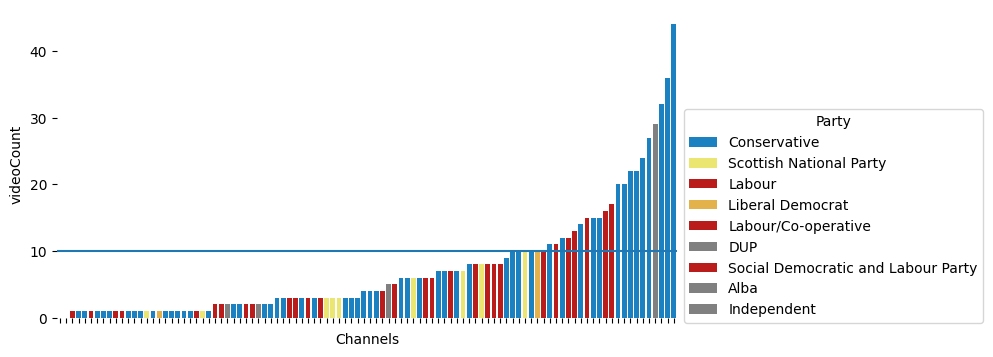

In [11]:
df = relevant_channels[relevant_channels['viewCount'] < 1000]
plt.figure(figsize=(8, 4)) # https://stackoverflow.com/a/638443
g = sn.barplot(df, x = 'Channel_Name', y = 'videoCount',
               hue = 'Party', palette = palette, #https://stackoverflow.com/a/46174007
              order=df.sort_values('videoCount').Channel_Name)
          # https://www.geeksforgeeks.org/seaborn-sort-bars-in-barplot/
g.set(xticklabels=[]) #https://stackoverflow.com/a/58476779
g.set_xlabel('Channels')
plt.axhline(y=10)
leg = plt.legend(bbox_to_anchor=(1, 0.7), #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
                 title = 'Party')

#### Followers

In [12]:
stats('subscriberCount', 'subscribers')

The channels have on average 2827.48 subscribers (SD:37894.79).


In case of the subscribers, we see that three MP's have many more subscribers than the rest: Rishi Sunak, Geroge Galloway and Andre Bridgen.

In [13]:
relevant_channels.sort_values('subscriberCount', ascending = False).head()

,Person ID,First name,Last name,Party,Constituency,URI,First_Name,Last_Name,Channel_Name,Channel_ID,Match,Correct,viewCount,subscriberCount,videoCount
1616,25428,Rishi,Sunak,Conservative,Richmond (Yorks),https://www.theyworkforyou.com/mp/25428/rishi_...,Rishi,Sunak,Rishi Sunak,UCFAdRzdogoJg5ctT8ZALp3g,True,Yes,144016137.0,646000.0,401.0
619,10218,George,Galloway,Workers Party,Rochdale,https://www.theyworkforyou.com/mp/10218/george...,George,Galloway,George Galloway MP,UCf_HItERkRB3vnkWt2RSOLg,True,Yes,84431523.0,428000.0,5435.0
173,24741,Andrew,Bridgen,Reclaim,North West Leicestershire,https://www.theyworkforyou.com/mp/24741/andrew...,Andrew,Bridgen,Andrew Bridgen MP,UCQKK9t6tyakuklNCh-dUT_g,True,Yes,2016732.0,39000.0,168.0
1225,24938,Penny,Mordaunt,Conservative,Portsmouth North,https://www.theyworkforyou.com/mp/24938/penny_...,Penny,Mordaunt,Penny Mordaunt,UC_L1ZWOuD4vMz060OTyMKXQ,True,Yes,1981929.0,7120.0,75.0
1417,24926,Jacob,Rees-Mogg,Conservative,North East Somerset,https://www.theyworkforyou.com/mp/24926/jacob_...,Jacob,Rees-Mogg,Jacob Rees-Mogg,UCBNLxgS02jhM0Et7cM3oB-w,True,Yes,531191.0,4960.0,49.0


Again, I need to mask those outliers because, otherwise, we can not differentiate between the other accounts.

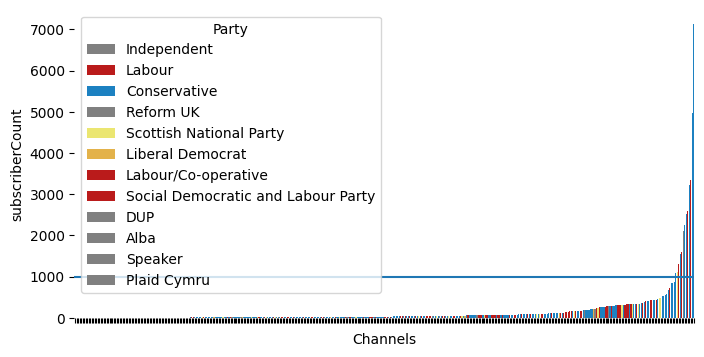

In [14]:
df = relevant_channels [relevant_channels['subscriberCount'] < 10000]
plt.figure(figsize=(8, 4)) # https://stackoverflow.com/a/638443
g = sn.barplot(df, x = 'Channel_Name', y = 'subscriberCount',
               hue = 'Party', palette = palette, #https://stackoverflow.com/a/46174007
              order=df.sort_values('subscriberCount').Channel_Name)
          # https://www.geeksforgeeks.org/seaborn-sort-bars-in-barplot/
g.set(xticklabels=[]) #https://stackoverflow.com/a/58476779
g.set_xlabel('Channels')
g

plt.axhline(y=1000)

But even without the outliers, it isn't easy to recognise anything because there are new outliers. Apparently, this is a beautiful example of the [exponential distribution of online media effects](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9114099/).  

I can work against it with a log transformation.

<ipython-input-15-5727a99518b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_channels.loc[:,'log_subscriber_count'] = relevant_channels['subscriberCount'].apply(np.log)


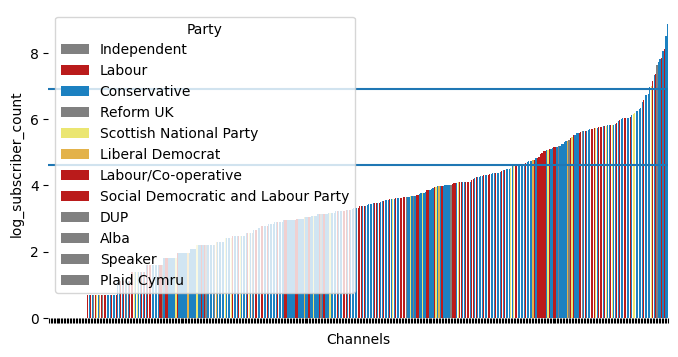

In [15]:
relevant_channels.loc[:,'log_subscriber_count'] = relevant_channels['subscriberCount'].apply(np.log)
df = relevant_channels[relevant_channels['subscriberCount'] < 10000]
plt.figure(figsize=(8, 4)) # https://stackoverflow.com/a/638443
g = sn.barplot(df,
               x = 'Channel_Name', y = 'log_subscriber_count',
               hue = 'Party', palette = palette, #https://stackoverflow.com/a/46174007
              order=df.sort_values('subscriberCount').Channel_Name)
          # https://www.geeksforgeeks.org/seaborn-sort-bars-in-barplot/
g.set(xticklabels=[]) #https://stackoverflow.com/a/58476779
g.set_xlabel('Channels')
plt.axhline(y=np.log(100)) # 100 Follower Line
plt.axhline(y=np.log(1000)) # 1000 Follower Line

# Selecting channels

For my project, I will only use channels that belong to labour or conservative politicians because they are the largest parties and stand for different political sides (Labour = Progressive, Conservatives = Conservative). Furthermore, I will only use channels with more than ten videos and more than 100 followers.

In [16]:
party = relevant_channels['Party'].isin(['Labour', 'Labour/Co-operative', "Social Democratic and Labour Party",
                                 "Conservative"])
video = relevant_channels['videoCount'] > 10
subscriber = relevant_channels['subscriberCount'] > 100
selected_channels = relevant_channels[party & video & subscriber]

print(f"{len(selected_channels)} channels have more than ten videos and more than 100 subscribers.")

labour = sum(selected_channels["Party"] != 'Conservative')
print(f"{labour} of those belong to Labour.")
print(f"{len(selected_channels)-labour} of those belong to the Conservatives.")

84 channels have more than ten videos and more than 100 subscribers.
32 of those belong to Labour.
52 of those belong to the Conservatives.


Because there are only 32 Labour Channels which match the criteria, I will sample 32 Conservative Channels. Furthermore, I will include the channels of the Labour party and the Conservative party in my dataset.

In [17]:
np.random.seed(general_seed)
labour = selected_channels[selected_channels["Party"] != 'Conservative']
conservative = selected_channels[selected_channels["Party"] == 'Conservative'].sample(32)
len(conservative)

32

In [18]:
final_channel_list = pd.concat([labour, conservative], ignore_index=True)
final_channel_list

,Person ID,First name,Last name,Party,Constituency,URI,First_Name,Last_Name,Channel_Name,Channel_ID,Match,Correct,viewCount,subscriberCount,videoCount,log_subscriber_count
0,24958,Rushanara,Ali,Labour,Bethnal Green and Bow,https://www.theyworkforyou.com/mp/24958/rushan...,Rushanara,Ali,Rushanara Ali,UC7iazTIj4W6EGAMs9CJrfJA,True,Yes,195110.0,1600.0,482.0,7.377759
1,25914,Apsana,Begum,Labour,Poplar and Limehouse,https://www.theyworkforyou.com/mp/25914/apsana...,Apsana,Begum,Apsana Begum,UCMVAWrRK5RczwyOJU0Z98Lg,True,Yes,48654.0,394.0,96.0,5.976351
2,10669,Hilary,Benn,Labour,Leeds Central,https://www.theyworkforyou.com/mp/10669/hilary...,Hilary,Benn,Hilary Benn,UC__lLAfCtpos4C5dIJTc2Mg,True,Yes,34913.0,154.0,50.0,5.036953
3,10753,Kevin,Brennan,Labour,Cardiff West,https://www.theyworkforyou.com/mp/10753/kevin_...,Kevin,Brennan,KevinBrennanTV,UCpROmTK0277JQYKMIhoy_rg,True,Yes,244035.0,340.0,423.0,5.828946
4,25391,Richard,Burgon,Labour,Leeds East,https://www.theyworkforyou.com/mp/25391/richar...,Richard,Burgon,Richard Burgon,UCIlwPOVeNhGurOlT2Ca31Ag,True,Yes,51973.0,333.0,36.0,5.808142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,25922,Robbie,Moore,Conservative,Keighley,https://www.theyworkforyou.com/mp/25922/robbie...,Robbie,Moore,Robbie Moore MP,UC2uU5GFpfYjarDjR1UBErmg,True,Yes,102965.0,202.0,99.0,5.308268
60,24822,Nadhim,Zahawi,Conservative,Stratford-on-Avon,https://www.theyworkforyou.com/mp/24822/nadhim...,Nadhim,Zahawi,Nadhim Zahawi,UC5pmZGgBiKE35V16FBYvytA,True,Yes,30011.0,280.0,11.0,5.634790
61,25805,Luke,Evans,Conservative,Bosworth,https://www.theyworkforyou.com/mp/25805/luke_e...,Luke,Evans,Dr Luke Evans MP,UCYz54XN7bE6E3hE0GsM0hYg,True,Yes,96250.0,283.0,309.0,5.645447
62,25645,Bob,Seely,Conservative,Isle of Wight,https://www.theyworkforyou.com/mp/25645/bob_se...,Bob,Seely,Bob Seely MP,UCN1wfVDGZo1BZOHAA4OPENw,True,Yes,98086.0,684.0,342.0,6.527958


It follows a short overview.

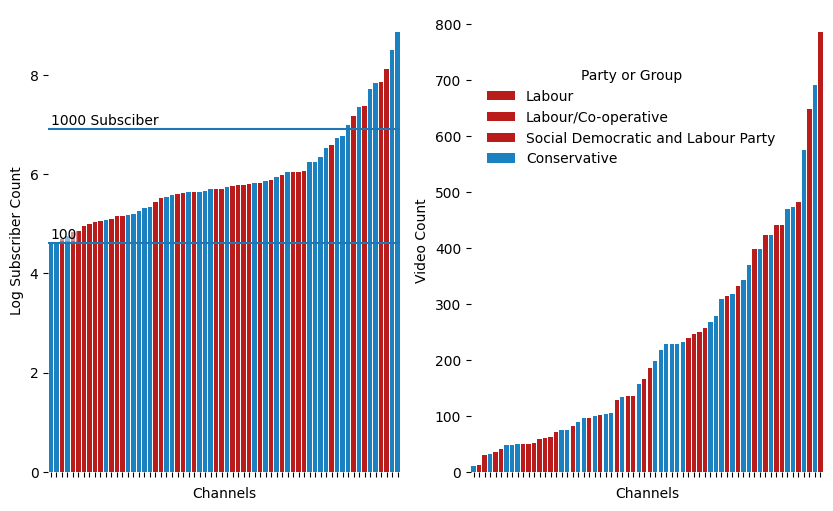

In [19]:
fig, ax = plt.subplots(1,2, figsize=(10, 6))

sn.barplot(final_channel_list, x = 'Channel_Name',y = 'log_subscriber_count',
               hue = 'Party', palette = palette, #https://stackoverflow.com/a/46174007
               order=final_channel_list.sort_values('subscriberCount').Channel_Name, # https://www.geeksforgeeks.org/seaborn-sort-bars-in-barplot/
               ax = ax[0])
sn.barplot(final_channel_list, x = 'Channel_Name', y = 'videoCount',
               hue = 'Party', palette = palette, #https://stackoverflow.com/a/46174007
               order=final_channel_list.sort_values('videoCount').Channel_Name,# https://www.geeksforgeeks.org/seaborn-sort-bars-in-barplot/
               ax = ax[1])

for axi in ax:
  axi.set(xticklabels=[]) #https://stackoverflow.com/a/58476779
  axi.set_xlabel('Channels')

ax[0].set_ylabel('Log Subscriber Count')
ax[0].axhline(y=np.log(100))
ax[0].annotate('100', xy=(0, 4.7), #https://matplotlib.org/1.5.3/users/annotations_intro.html
                bbox=dict(facecolor='white',  #https://stackoverflow.com/questions/17086847/box-around-text-in-matplotlib
                          edgecolor='none',
                          boxstyle='round', pad = 0,
                          alpha=.5))
ax[0].axhline(y=np.log(1000))
ax[0].annotate('1000 Subsciber', xy=(0, 7))
ax[0].get_legend().remove() #https://stackoverflow.com/a/26845924

ax[1].set_ylabel('Video Count')
ax[1].legend(title = 'Party or Group', #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
             bbox_to_anchor=(0.9,0.9),
             frameon=False,) #https://stackoverflow.com/a/4701285

fig.savefig('channels.png')

# Get videos from each channel

For all channels, I will get the ten latest videos because in this way, I can ensure that the video count is balanced. Sometimes, the API provides more results than asked for, so I delete surplus videos.

This, again, is the YouTube search API, which allows only 100 searches a day.

In [20]:
video_list = []
for mp_index in range(0, len(final_channel_list)):

  # Create URL
  first_url = 'https://youtube.googleapis.com/youtube/v3/search?part=snippet'
  channel = f"&channelId={final_channel_list.loc[mp_index,'Channel_ID']}"
  second_url = f'&maxResults=10&type=video&key={youtube_api_key_2}'
  url = first_url + channel + second_url

  # Request data
  r = requests.get(url)
  print(r)
  if r.status_code == 403: # once google tells me, i exceeded the limit it stops
    break

  # Append Data
  result = r.json()
  video_list.append(result)


<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


KeyboardInterrupt: 

I now also scrape 350 videos from each of the official party accounts. For this, I need to deal with google pagination. https://developers.google.com/youtube/v3/guides/implementation/pagination

In [21]:
parties = [['Labour Party', 'UCEBNsfXgUO74N70MJEhJQ1g', 'Labour'],
 ['Conservatives', 'UCXNSyuKeoiHOld1OS3kHuVg', 'Conservative']]

In [22]:
for party in parties:

  # First Page
  first_url = 'https://youtube.googleapis.com/youtube/v3/search?part=snippet'
  channel = f"&channelId={party[1]}"
  second_url = f'&maxResults=50&type=video&key={youtube_api_key_1}'
  url = first_url + channel + second_url

  # Request data
  r = requests.get(url)
  print(r)

  # Append Data
  result = r.json()
  video_list.append(result)

  # Second Page
  page_token = result['nextPageToken']
  print(page_token)

  for i in range(0,7): # to get 300 further videos:
    first_url = 'https://youtube.googleapis.com/youtube/v3/search?part=snippet'
    channel = f"&channelId={party[1]}"
    second_url = f'&maxResults=50&pageToken={page_token}&type=video&key={youtube_api_key_1}'
    url = first_url + channel + second_url

    # Request data
    r = requests.get(url)
    print(r)

    # Append Data
    result = r.json()
    video_list.append(result)

    # get new token
    page_token = result['nextPageToken']

<Response [200]>
CDIQAA
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


KeyboardInterrupt: 

In [23]:
channel_videos = pd.json_normalize(video_list[0]['items'])
for i in range(1,len(video_list)):
  channel_videos = pd.concat([channel_videos, pd.json_normalize(video_list[i]['items'])])

# Selecting relevant columns
channel_videos = channel_videos[['id.videoId',
                'snippet.title',
                'snippet.publishedAt',
                'snippet.channelId',
                'snippet.channelTitle']]

#Renaming and other cleanups
channel_videos.columns = channel_videos.columns.str.split('.').str[1]
channel_videos = channel_videos.reset_index(drop = True)
channel_videos = channel_videos[~ channel_videos.duplicated('videoId', keep = 'first')]
channel_videos = channel_videos.reset_index(drop = True)

channel_videos.to_csv('channel_videos.csv')

print(len(channel_videos))

330


Apparently there where some duplicates for the Labour Party, which I now removed. Therefore, the labour party has less videos.

In [24]:
channel_videos.groupby('channelTitle')['channelTitle'].count().sort_values(ascending = False)

channelTitle
Labour Party      260
Apsana Begum       10
Dan Carden MP      10
Dawn Butler        10
Hilary Benn        10
KevinBrennanTV     10
Richard Burgon     10
Rushanara Ali      10
Name: channelTitle, dtype: int64

It follows a quick check, whether the channels are actually correct (are the video titles politics related?).

In [25]:
channel_videos = pd.read_csv('/content/political_hope_nostalgia/UK_MP_Youtube_videos.csv') # for demonstration purposes
def example(n = 1):
  titles = channel_videos['title'].tolist()
  selection = random.sample(titles, n)
  for text in selection:
    print(text)

In [26]:
example(10)

Who does Rishi Sunak think has been in power for the last 14 years? 🤔
Dawn questions experts in AI on the Science and Technology Committee
Tokyo Olympics message of good luck.
Remembrance Sunday message from Chris Loder MP
Asking Justice Secretary, Dominic Raab to visit HMP Berwyn in Wrexham to see the Employment Board
Next generation Covid testing
Her Majesty&#39;s Royal Marines Band
William Hague: Speech to Conservative Party Conference 2014
Keir Starmer will build an NHS fit for the future
Supporting local businesses


In case you want to search for a video, you can enter the title below.

In [27]:
channel_videos[channel_videos['title'] =='Reading Half Marathon 2023']

,Unnamed: 0,videoId,title,publishedAt,channelId,channelTitle,transcript,viewCount,likeCount,commentCount
279,279,X70EgQ4oq7A,Reading Half Marathon 2023,2023-04-02T20:32:42Z,UC2U9rYxKY0FjftF8PTSFXQQ,Matt Rodda MP,it's been a fantastic atmosphere today's half ...,133.0,1.0,0.0


## Get Statistics to All Videos

In [5]:
# channel_videos = pd.read_csv('channel_videos.csv') #if using self-created dataset
channel_videos = pd.read_csv('/content/political_hope_nostalgia/UK_MP_Youtube_videos.csv') #if analyzing my final dataset

In [28]:
id_nr = 0
results = []
while id_nr < len(channel_videos): # while, because 50 ID's at a time
  print(f'Batch starts with Video Nr. {id_nr}')
  # Create URL
    # I got the URL format from https://developers.google.com/youtube/v3/docs/channels/lis
    # Where is used 'Try this Method' and then looked at the HTML code
  base_url = 'https://youtube.googleapis.com/youtube/v3/videos?part=statistics'

  # I itteratively add 50 channel ids to the base_url
  for i in range(
      id_nr, min(
          id_nr + 50, # i can get the statistics for maximal 50 id's a time
          len(channel_videos) # the last batch is less than 50 id's
          )
      ):
    base_url += f"&id={channel_videos.loc[i, 'videoId']}"

  base_url += f'&maxResults=50&key={youtube_api_key_1}'

  # Request and Append Data
  r = requests.get(base_url)
  print(r)
  if r.status_code == 403: # once google tells me that i exceeded the limit, it stops
    break
  result = r.json()
  results.append(result)

  # Increase Index
  id_nr = id_nr + 50

Batch starts with Video Nr. 0
<Response [200]>
Batch starts with Video Nr. 50
<Response [200]>
Batch starts with Video Nr. 100
<Response [200]>
Batch starts with Video Nr. 150
<Response [200]>
Batch starts with Video Nr. 200
<Response [200]>
Batch starts with Video Nr. 250
<Response [200]>
Batch starts with Video Nr. 300
<Response [200]>
Batch starts with Video Nr. 350
<Response [200]>
Batch starts with Video Nr. 400
<Response [200]>
Batch starts with Video Nr. 450
<Response [200]>
Batch starts with Video Nr. 500
<Response [200]>
Batch starts with Video Nr. 550
<Response [200]>
Batch starts with Video Nr. 600
<Response [200]>
Batch starts with Video Nr. 650
<Response [200]>
Batch starts with Video Nr. 700
<Response [200]>
Batch starts with Video Nr. 750
<Response [200]>
Batch starts with Video Nr. 800
<Response [200]>
Batch starts with Video Nr. 850
<Response [200]>
Batch starts with Video Nr. 900
<Response [200]>
Batch starts with Video Nr. 950
<Response [200]>
Batch starts with Video

KeyboardInterrupt: 

In [29]:
video_statistics = pd.json_normalize(results[0]['items'])
for i in range(1,len(results)):
  video_statistics = pd.concat([video_statistics, pd.json_normalize(results[i]['items'])])

video_statistics = video_statistics[['id',
                                         "statistics.viewCount",
                                         'statistics.likeCount',
                                         'statistics.commentCount']]
video_statistics.columns = ['videoId',
                                         "viewCount",
                                         'likeCount',
                                         'commentCount']

video_statistics['videoId'] = video_statistics['videoId'].astype('string')
video_statistics['viewCount'] = video_statistics['viewCount'].astype('float') #NAN can not be conerted to integer
video_statistics['likeCount'] = video_statistics['likeCount'].astype('float')
video_statistics['commentCount'] = video_statistics['commentCount'].astype('float')

print(len(video_statistics))

1097


In [30]:
len(channel_videos)

1283

In [31]:
channel_videos.loc['videoId'] = channel_videos['videoId'].astype('string')
channel_videos = pd.merge(left = channel_videos,
                    right = video_statistics,
                    on = "videoId",
                    how='left',
                    copy = False)
channel_videos = channel_videos[~channel_videos['videoId'].isna()]
channel_videos.to_csv('channel_videos.csv')
len(channel_videos)

1283

## Get Transcripts

I can use the [YouTube Transcript API](https://pypi.org/project/youtube-transcript-api/) to get the transcripts. This API also allows for a batch version, however, in this version it stops the whole execution if there is some video without transcript and the progress is lost. Therefore, I get one video at a time. Unfortunately, this makes the process quite slow.
The transcript comes as a list of dictionaries with each dictionary entailing some part of the transcript under the key text. I join all those texts into one single text.

In [ ]:
# channel_videos = channel_videos.iloc[:,2:] deletes first row, only necessary if you created your own channels videos

In [ ]:
for i in range(0, len(channel_videos)):
  # Get Transcript
  video = channel_videos.loc[i,'videoId']
  try:
    transcript = YouTubeTranscriptApi.get_transcript(video)
    text = ''
    for element in transcript:
      text += element['text'] + ' '
      channel_videos.loc[i,'transcript'] = text
  except:
    print(f'Here was an error: {i}')

channel_videos.to_csv('channel_videos_new.csv')
files.download("channel_videos_new.csv")

Here was an error: 67
Here was an error: 70
Here was an error: 73
Here was an error: 86
Here was an error: 95
Here was an error: 97


In [6]:
print(f"{sum(channel_videos['transcript'].isnull())} Videos did not have a transcript.")

104 Videos did not have a transcript.


In [7]:
sum(~channel_videos['transcript'].isnull())

1179

Statistics to the transcripts

In [8]:
channel_videos['transcript'].str.len().mean()

4411.737913486005

The shortest string

In [9]:
channel_videos['transcript'].str.len().min()

8.0

In [10]:
id = channel_videos['transcript'].str.len().idxmin()
channel_videos.loc[id, 'transcript']

'[Music] '

The longest string

In [11]:
channel_videos['transcript'].str.len().max()

135578.0

In [12]:
id = channel_videos['transcript'].str.len().idxmax()
channel_videos.loc[id]

Unnamed: 0                                                    918
videoId                                               E8YlUqPBh9U
title           Labour Party Annual Conference 2019: Monday Af...
publishedAt                                  2019-09-23T17:28:00Z
channelId                                UCEBNsfXgUO74N70MJEhJQ1g
channelTitle                                         Labour Party
transcript      (Music)  >> Delegates please welcome \nWendy N...
viewCount                                                 12017.0
likeCount                                                   145.0
commentCount                                                  NaN
Name: 918, dtype: object

In [15]:
channel_videos.loc[channel_videos['transcript'].str.len().idxmax(),'transcript']

'(Music)  >> Delegates please welcome \nWendy Nichols and the pat form  party., if\n(Applause) clap (Applause) >> Delegates, can you take your \nseats and then we can start this afternoon\'s session. We\'ve obviously got a very \nimportant, can I ask you to  settle down and be quiet, if I \ndare say that - which I dare! I might say something different \nif it carries on, but can you  just settle down.  Be quiet. That means stopping talking for \nnow and listen to what we\'re  going to do. OOOHHH I told you I can be \ntetchy. OK, this afternoon we\'ll \ncontinue our  debate on our is international \nissues.  I have some information for you. It is clear the information \nprovided  to delegates   assisted in the \nvoting on reference back this  morning. To maximise information \navailable to  delegates for debates tomorrow, \nthe CAC  has made available the online \nform for  reference back the link can be \nfound at, I\'ll get this wrong. Https Https/Labour.org.\nUK/reference back form. 

In [16]:
channel_videos['publishedAt'].min()

'2006-07-23T17:02:58Z'

In [17]:
channel_videos['publishedAt'].max()

'2024-05-02T18:00:32Z'